# Lets build a model them model the growth of cancer cell

### using SCINTIFIC AND   COMPUTING  METHOD 

## 🧬 Gompertzian Model for Tumor Growth

This model describes the growth dynamics of a tumor, often incorporating the effects of treatment.

### A Simple ODE (Ordinary Differential Equation)

The core equation for the model is:

$$
\frac{dT}{dt} = r T \ln\left(\frac{K}{T}\right) - c(t)T
$$

---

### Parameter Definitions

Here is a breakdown of each component in the equation:

* **$T(t)$ (Tumor Size)**
    * **Represents:** The size of the tumor at a given time $t$.
    * **Can be measured as:**
        * Number of cancerous cells
        * Tumor volume (e.g., in $mm^3$ or $cm^3$)
        * Normalized fraction (e.g., a value between 0 and 1)

* **$r$ (Tumor Growth Rate)**
    * **Represents:** How fast the tumor grows, particularly when it is small.
    * **Units:** Typically `per day` (or inverse time, $time^{-1}$).
    * **Biological Influences:**
        * Cell division rate
        * Nutrient availability
        * Angiogenesis (Blood Supply Formation)

* **$K$ (Carrying Capacity)**
    * **Represents:** The maximum tumor size that the surrounding environment can sustain.
    * **Units:** Same units as $T(t)$ (e.g., volume, cell count, or normalized size).
    * **Why growth stalls at this point:**
        1.  Lack of nutrients
        2.  Limited space
        3.  Immune system pressure

* **$c(t)$ (Chemotherapy-Induced Kill Rate)**
    * **Represents:** The rate at which chemotherapy (or any anti-cancer intervention) kills tumor cells over time.
    * **Function:** It reduces the growth of the tumor by introducing a negative pressure on the population of cancerous cells.

##### The taradiational deep learning model act as  block box and does not understand the mechanistic model behind the working of model

# **WHY NOT TO BAKE THE KNOW PYSCICAL STRUCTURE WITH THE NEURAL NETWORK**

## 🧠 Universal Differential Equations (UDE)

This approach combines known scientific models with machine learning to create more powerful predictive tools.

### The Hybrid Equation

Instead of using unknown fixed parameters, we embed neural networks directly into the differential equation to learn the complex, unknown parts.

$$
\frac{dT}{dt} = \text{[Neural Network}_1\text{]} \cdot T \cdot \ln\left(\frac{\text{[Neural Network}_2\text{]}}{T}\right) - c(t)T
$$

### Guiding Philosophy

> Why should we throw our knowledge away?
>
> Here we leverage the **"science"** of tumor growth and **"power"** of ML.

---

### The Core Concept

A Universal Differential Equation (UDE) is the fusion of these two fields:

**Differential Equations** + **Neural Network** = **Universal Differential Equations**

![Cancer GIF.gif](<attachment:Cancer GIF.gif>)
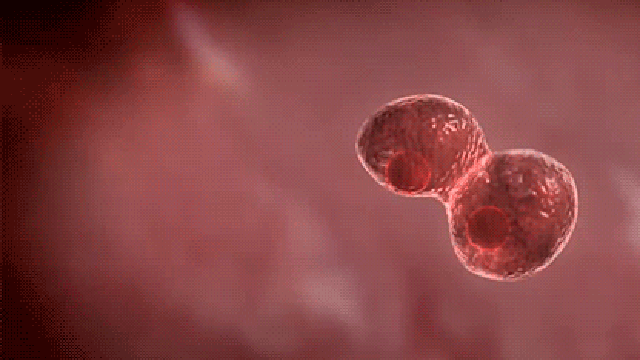

## 🚀 The UDE Training Workflow: From Guess to Forecast

This is the step-by-step "engine" that trains the model. It's a loop that connects the neural networks, the differential equation, and the real-world data.

### 1. The "Forward Pass" ➡️: (Prediction & Simulation)

This is where the model makes its *first guess*. It flows in this order:

1.  **Input:** Start with the *current* known tumor size, $T$. (At the very beginning, this is the initial size $T_0$).
2.  **NN Prediction:** You feed this $T$ into the two neural networks (NNs) *simultaneously*:
    * `NN1` (with its current random "knobs") predicts a value for the growth rate $r$.
    * `NN2` (with *its* current random "knobs") predicts a value for the carrying capacity $K$.
3.  **Build the Equation:** These predicted values, $r_{pred}$ and $K_{pred}$, are plugged into the Gompertz equation. Now you have a *complete* equation with *specific numbers*:
    $$
    \frac{dT}{dt} = r_{pred} \cdot T \cdot \ln\left(\frac{K_{pred}}{T}\right) - c(t)T
    $$
4.  **Numerical Analysis (Integration):** The equation above only gives you the *speed* ($\frac{dT}{dt}$). To get the *size* over time, you must solve it. A computer does this using numerical integration.
    * It starts at $T_0$.
    * It uses the equation to find the speed.
    * It takes a tiny step forward in time (e.g., 0.1 days) to predict the new size, $T_1$.
    * It repeats this process (using $T_1$ to find the speed for $T_2$, etc.) until it has generated a **full predicted tumor size curve** ($T_{predicted}$) over all 50 days.

---

### 2. The "Backward Pass" ⬅️: (Calculating & Minimizing Loss)

This is the "learning" part. The model compares its *guess* to the *reality*.

5.  **Calculate Loss:** The model now compares its predicted curve ($T_{predicted}$) with the **actual data** ($T_{true}$). It uses a **Loss Function** (e.g., Mean Squared Error) to get a single number for how "wrong" it was.
    * **Formula:** $\text{Loss} = \text{Average of } (T_{predicted} - T_{true})^2 \text{ for all time points}$.
    * A **high loss** means the guess was terrible.
    * A **low loss** means the guess was good.

6.  **Backpropagation (The "Magic"):** This is the core of "minimizing the loss."
    * The optimizer (like LBFGS) looks at the final `Loss` number.
    * It calculates *how much* each individual "knob" (weight and bias) *inside* `NN1` and `NN2` contributed to that final error.
    * It then **"nudges" all the knobs** in the direction that would have made the error smaller.

---

### 3. The Loop 🔁: (Repeat to Improve)

7.  **Iterate:** The entire process (Steps 1-6) is one "iteration" or "epoch." The model then **repeats this loop** hundreds or thousands of times.
    * **Loop 2:** The NNs (with their newly nudged knobs) make a *slightly better* prediction for $r$ and $K$.
    * **Loop 3:** The predicted curve $T_{predicted}$ is now *slightly closer* to the true data $T_{true}$.
    * **Loop 4:** The `Loss` is *slightly smaller*.
    * ...
    * **Loop 50:** After many iterations, the NNs have "learned" to predict the *true* underlying $r$ and $K$ values. The predicted curve ($T_{predicted}$) will now almost perfectly overlap with the real data ($T_{true}$), and the `Loss` will be very close to zero.

---

### 🏁 The Result: A Trained Model

You now have a fully trained UDE. The neural networks have "discovered" the hidden biological parameters ($r$ and $K$) for this specific tumor, just by looking at the size data.